In [23]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier




In [ ]:
df_copy = pd.read_excel('DLL_full_dataset.xlsx')
df_all=df_copy.copy()
df_all.head()

In [11]:
df_all['income'].fillna(df_all['income'].mean(), inplace=True)
df_all['num_dependents'].fillna(df_all['num_dependents'].mean(), inplace=True)
df_all.isnull().sum()

personal_credit_%    0
age                  0
A30-60_Counter       0
expense_ratio        0
income               0
num_loans            0
A90+_Counter         0
num_home_loans       0
A60-90_Counter       0
num_dependents       0
PD_2years            0
dtype: int64

In [12]:
df_all.drop(['A90+_Counter'], axis = 1, inplace=True)

Splitting the data


In [13]:
from sklearn.model_selection import train_test_split
df_inputs_prepr = df_all.drop('PD_2years', axis = 1)
df_targets_prepr = df_all['PD_2years']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_inputs_prepr ,df_targets_prepr, test_size = 0.2, random_state = 42,stratify=df_targets_prepr)

##KNN analysis

In [17]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X_train)

# Predict and print the label for the new data point X_new
prediction_knn = knn.predict(X_test)
acc_test = accuracy_score(prediction_knn, y_test)

print('Test set accuracy of KNN: {:.2f}'.format(acc_test)) 
print(classification_report(y_test,prediction_knn))
print(confusion_matrix(y_test,prediction_knn))

Test set accuracy of KNN: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     27995
           1       0.35      0.05      0.09      2005

    accuracy                           0.93     30000
   macro avg       0.64      0.52      0.53     30000
weighted avg       0.90      0.93      0.91     30000

[[27799   196]
 [ 1898   107]]


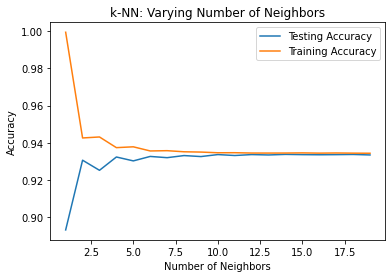

In [16]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train )

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


##Training a Decision Tree Model

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions_dt = dtree.predict(X_test)
print(classification_report(y_test,predictions_dt))
print(confusion_matrix(y_test,predictions_dt))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     27995
           1       0.22      0.25      0.23      2005

    accuracy                           0.89     30000
   macro avg       0.58      0.59      0.59     30000
weighted avg       0.90      0.89      0.89     30000

[[26220  1775]
 [ 1506   499]]


## Bagging

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier



dt = DecisionTreeClassifier(random_state=1)

bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [20]:
bc.fit(X_train, y_train)

y_pred_bg = bc.predict(X_test)

acc_test = accuracy_score(y_pred_bg, y_test)

print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 
print(classification_report(y_test,y_pred_bg))
print(confusion_matrix(y_test,y_pred_bg))

Test set accuracy of bc: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     27995
           1       0.45      0.15      0.23      2005

    accuracy                           0.93     30000
   macro avg       0.70      0.57      0.60     30000
weighted avg       0.91      0.93      0.91     30000

[[27631   364]
 [ 1703   302]]


Out of Bagging Evaluation

In [21]:
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

bc = BaggingClassifier(base_estimator=dt,n_estimators=50, oob_score=True,random_state=1)

bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)

acc_oob = bc.oob_score_

print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.934, OOB accuracy: 0.934


##Training the Random Forest model

In [24]:
rfc = RandomForestClassifier(n_estimators=25, random_state=2)
rfc.fit(X_train,y_train)
predictions_rf = rfc.predict(X_test)

acc_test = accuracy_score(predictions_rf, y_test)

print('Test set accuracy of rf: {:.2f}'.format(acc_test)) 
print(classification_report(y_test,predictions_rf))
print(confusion_matrix(y_test,predictions_rf))

Test set accuracy of rf: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     27995
           1       0.43      0.15      0.22      2005

    accuracy                           0.93     30000
   macro avg       0.69      0.57      0.59     30000
weighted avg       0.91      0.93      0.91     30000

[[27611   384]
 [ 1714   291]]


**Feature Importance on Random Forest**

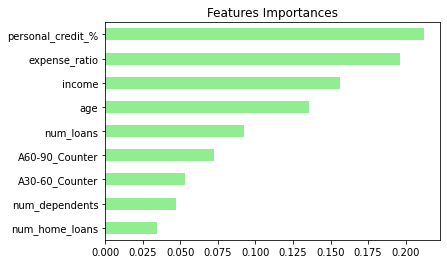

In [25]:
# Create a pd.Series of features importances
importances = pd.Series(data=rfc.feature_importances_,
                        index= df_X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()